<a href="https://colab.research.google.com/github/krakowiakpawel9/convnet-course/blob/master/03_cifar_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trenowanie prostej sieci neuronowej na zbiorze MNIST

In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import rmsprop
import os

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


### Zdefiniowanie kilku stałych

In [0]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
img_rows, img_cols = 32, 32

### Załadowanie danych

In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

### Eksploracja danych


In [0]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

print('Liczba dabych treningowych:', train_images.shape[0])
print('Liczba danych testowych:', test_images.shape[0])
print('Rozmiar pojedynczego obrazka:', train_images[0].shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
Liczba dabych treningowych: 50000
Liczba danych testowych: 10000
Rozmiar pojedynczego obrazka: (32, 32, 3)


### Wyświetlenie obrazka

(-0.5, 31.5, 31.5, -0.5)

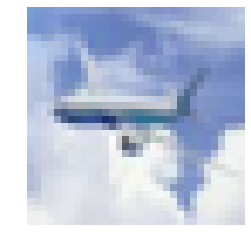

In [0]:
#@title Wybierz index obrazka
import matplotlib.pyplot as plt

index = 29286 #@param {'type': 'slider', min:0, max:50000 }
plt.imshow(train_images[index])
plt.axis('off')

### Wyświetlenie kilku obrazków

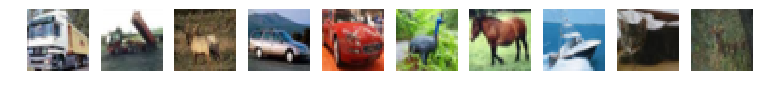

In [0]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(train_images[i])
plt.show()

### Wyświetlenie etykiet

In [0]:
print('train_labels:', train_labels)
print('train_labels shape:', train_labels.shape)

train_labels: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
train_labels shape: (50000, 1)


## Przygotowanie danych

In [0]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Przygotowanie etykiet 

In [0]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes=num_classes)

print(train_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)


In [0]:
print(train_labels[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Budowa modelu

In [0]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',
                 input_shape=train_images.shape[1:],
                 activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

W0711 09:18:27.967254 140093159724928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 09:18:27.986134 140093159724928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 09:18:27.989786 140093159724928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 09:18:28.033163 140093159724928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0711 09:18:28.036953 140093159724928 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

### Kompilacja modelu

In [0]:
model.compile(optimizer=rmsprop(lr=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### Trenowanie modelu

In [0]:
history = model.fit(train_images, train_labels,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(test_images, test_labels),
                   shuffle=True)

W0711 09:19:11.043560 140093159724928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 24s 489us/step - loss: 1.8021 - acc: 0.3383 - val_loss: 1.6052 - val_acc: 0.4242
Epoch 2/20
50000/50000 [==============================] - 21s 422us/step - loss: 1.5058 - acc: 0.4519 - val_loss: 1.3650 - val_acc: 0.5130
Epoch 3/20
50000/50000 [==============================] - 21s 412us/step - loss: 1.3700 - acc: 0.5061 - val_loss: 1.2754 - val_acc: 0.5486
Epoch 4/20
50000/50000 [==============================] - 20s 403us/step - loss: 1.2806 - acc: 0.5427 - val_loss: 1.1655 - val_acc: 0.5846
Epoch 5/20
50000/50000 [==============================] - 20s 407us/step - loss: 1.1986 - acc: 0.5720 - val_loss: 1.1634 - val_acc: 0.5959
Epoch 6/20
50000/50000 [==============================] - 20s 407us/step - loss: 1.1325 - acc: 0.5995 - val_loss: 1.0888 - val_acc: 0.6151
Epoch 7/20
50000/50000 [==============================] - 20s 405us/step - loss: 1.0701 - acc: 0.6227 - val_loss: 1.

### Augmentacja danych

In [0]:
print('Użycie techniki augmentacji danych')

# augmentacja danych w czasie rzeczywistym, podczas trenowania
datagen = ImageDataGenerator(
    rotation_range=0.1, # losowe obracanie obrazów w zakresie 0 do 180 stopni
    width_shift_range=0.1, # losowe przesuwanie obrazów w poziomie
    height_shift_range=0.1, # losowe przesuwanie obrazów w pionie
    shear_range=0., # losowe ściannie obrazów
    zoom_range=0., # losowy zoom obrazów
    fill_mode='nearset', # tryp wypełniania punktów poza granicami wejściowymi
    horizontal_flip=True, # losowo odwraca zdjęcia horyzontalnie
    vertical_flip=True, # losowo odwraca zdjecia pionowo
    rescale=None, # ustawienie współczynnika przeskalowania
    validation_split=0.0 # ułamek danych zarezerwowanych dla walidacji
    )

# dopasowanie zbioru do naszego zadania (obliczenie średniej, odchylenia)
datagen.fit(train_images)

# trenowanie modelu wsadami generowanymi przez datagen.flow()
model.fit_generator(datagen.flow(train_images, test_images, batch_size=batch_size),
                   epochs=epochs,
                   validation_data=(test_images, test_labels),
                   workers=4)

### Zapisanie modelu

In [0]:
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at {}.'.format(model_path))

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5.


### Ocena modelu

In [0]:
score = model.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 148us/step
Test loss: 0.7626843214988709
Test accuracy: 0.7411


### Wykres dokładności

In [0]:
def make_accuracy_plot(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['acc'], history.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history):
    """
    Funkcja zwraca wykres straty (loss) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Strata trenowania', marker='o')
    plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()

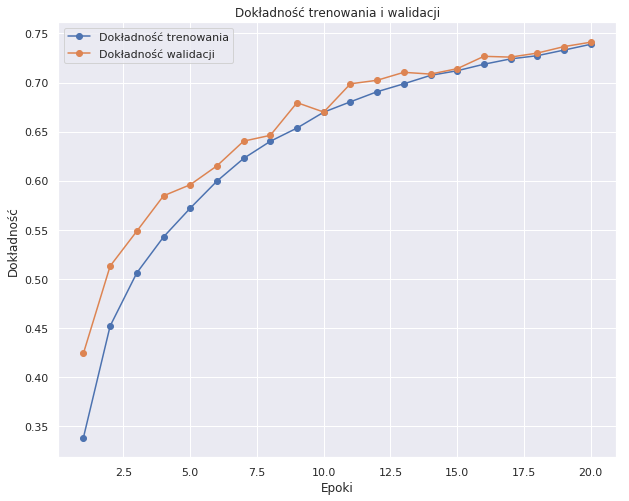

In [0]:
make_accuracy_plot(history)

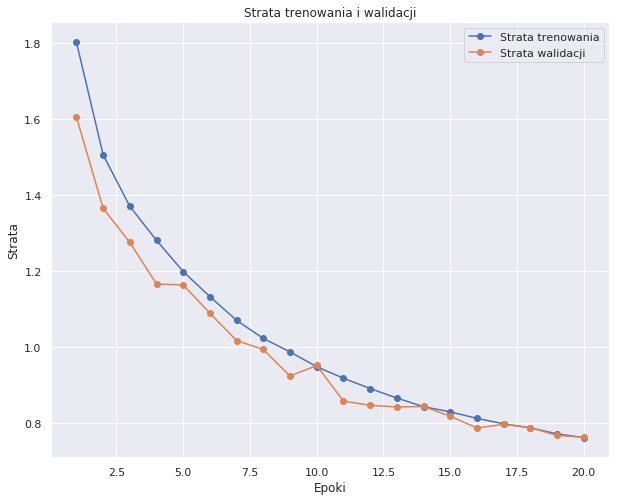

In [0]:
make_loss_plot(history)